### Test Code for Module SVM

In [1]:
include("./script.jl")
import .SVM

In [2]:
import Plots
import Random

In [3]:
include("../tools.jl")
import .JuTools

In [4]:
linear_func = m -> 2 * m - 20
X_data, Y_data = JuTools.data_generate_linear_2d(linear_func=linear_func, data_size=500, 
    range_min=0.0, range_max=100.0, random_scale=20.0)
Y_data .= Y_data .* 2.0 .- 1.0
println(size(X_data))
println(size(Y_data))

(500, 2)
(500,)


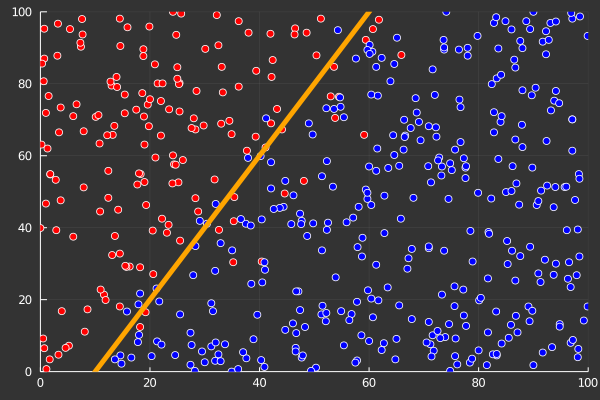

In [5]:
# plot the data
plot_X1 = [X_data[i, 1] for i in 1:(size(X_data)[1]) if Y_data[i] == -1.0]
plot_Y1 = [X_data[i, 2] for i in 1:(size(X_data)[1]) if Y_data[i] == -1.0]
plot_X2 = [X_data[i, 1] for i in 1:(size(X_data)[1]) if Y_data[i] == 1.0]
plot_Y2 = [X_data[i, 2] for i in 1:(size(X_data)[1]) if Y_data[i] == 1.0]
plot_X3 = [i for i in 0:100]
plot_Y3 = [linear_func(m) for m in plot_X3]
Plots.gr()
Plots.scatter(plot_X1, plot_Y1, leg=false, c="red", background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.plot!(plot_X3, plot_Y3, leg=false, c="orange", linewidth=5)
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

### Linear SVM

In [6]:
weights = SVM.train_linear(X_data, Y_data, 1.0, learning_rate=0.005, max_iter=10, early_stop=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data))

Accuracy: 0.952


In [7]:
weights = SVM.train_linear(X_data, Y_data, 1.0, learning_rate=0.005, max_iter=100, early_stop=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data))

Accuracy: 0.95


In [8]:
weights = SVM.train_linear(X_data, Y_data, 1.0, learning_rate=0.005, max_iter=1000, early_stop=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data))

Accuracy: 0.944


In [9]:
weights = SVM.train_linear(X_data, Y_data, 1.0, learning_rate=0.005, max_iter=10000, early_stop=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data))

Accuracy: 0.938


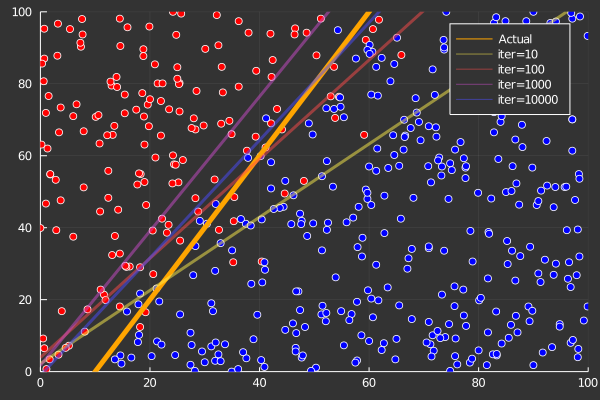

In [10]:
# plot comparison graph
Plots.gr()
Plots.scatter(plot_X1, plot_Y1, c="red", background_color=Plots.RGB(0.2, 0.2, 0.2), label="")
Plots.scatter!(plot_X2, plot_Y2, c="blue", label="")
Plots.plot!(plot_X3, plot_Y3, c="orange", linewidth=5, label="Actual")
accuracy = Array{Float64}(undef, 4)
for (i, iternum) in enumerate([10, 100, 1000, 10000])
    weights = SVM.train_linear(X_data, Y_data, 1.0, learning_rate=0.005, max_iter=iternum)
    accuracy[i] = JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data)
    @assert size(weights.w)[1] == 2
    plot_Y3_ = -(weights.b .+ (weights.w[1] .* plot_X3)) ./ weights.w[2]
    Plots.plot!(plot_X3, plot_Y3_, palette=:lightrainbow, linewidth=3, label="iter=$iternum", alpha=0.5)
end
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

In [11]:
println("Accuracys are: ", accuracy)

Accuracys are: [0.87, 0.932, 0.902, 0.942]


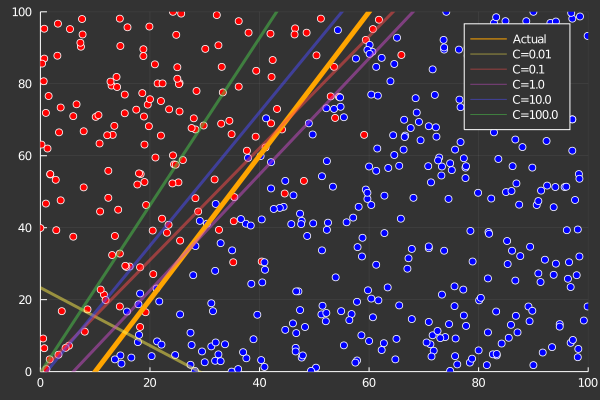

In [12]:
Plots.gr()
Plots.scatter(plot_X1, plot_Y1, c="red", background_color=Plots.RGB(0.2, 0.2, 0.2), label="")
Plots.scatter!(plot_X2, plot_Y2, c="blue", label="")
Plots.plot!(plot_X3, plot_Y3, c="orange", linewidth=5, label="Actual")
accuracy = Array{Float64}(undef, 5)
for (i, cnum) in enumerate([0.01, 0.1, 1.0, 10.0, 100.0])
    weights = SVM.train_linear(X_data, Y_data, cnum, learning_rate=0.005, max_iter=1000)
    accuracy[i] = JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data)
    @assert size(weights.w)[1] == 2
    plot_Y3_ = -(weights.b .+ (weights.w[1] .* plot_X3)) ./ weights.w[2]
    Plots.plot!(plot_X3, plot_Y3_, palette=:lightrainbow, linewidth=3, label="C=$cnum", alpha=0.5)
end
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

In [13]:
println("Accuracys are: ", accuracy)

Accuracys are: [0.678, 0.942, 0.946, 0.926, 0.868]
